<a href="https://colab.research.google.com/github/snehakap/Face-recognition/blob/main/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cmake
!pip install dlib

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=5cd573d6f8495a8796123c55735af398d5d3a71886f404649e9c9e6da1a2a7d7
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
!mkdir Known

In [ ]:
!mkdir Unknown

In [ ]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

processing Image2.jfif


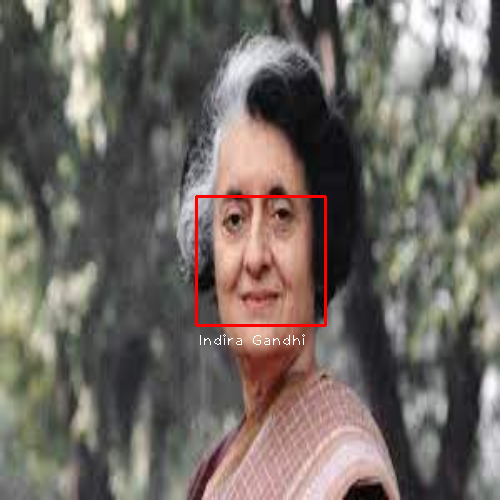

processing image3.jfif


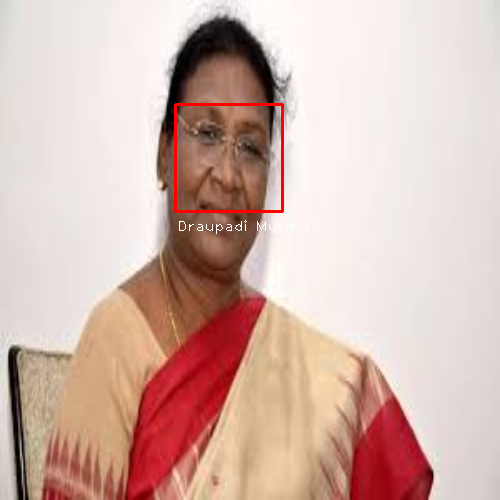

processing image1.jfif


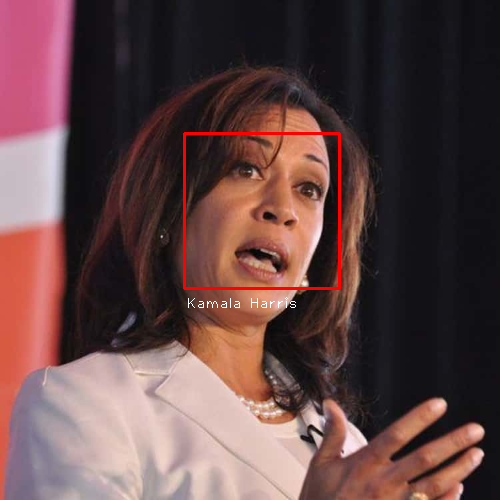

In [ ]:
import face_recognition_models
def read_img(path):
  img = cv2.imread(path)
  (h,w) = img.shape[:2]
  width = 500
  ratio = width/float(w)
  height = int(w*ratio)
  return cv2.resize(img, (width,height))

known_encodings=[]
known_names=[]
known_dir='Known'

for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' +file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])

unknown_dir= "Unknown"
for file in os.listdir(unknown_dir):
  print('processing',file)
  img = read_img(unknown_dir + '/' +file)
  img_enc = face_recognition.face_encodings(img)[0]

  results = face_recognition.compare_faces(known_encodings, img_enc)

  for i in range(len(results)):
    if results[i]:
      name = known_names[i]
      (top,right,bottom,left) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img,(left,top),(right,bottom),(0,0,255),2)
      cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1,(255,255,255),1)
      cv2_imshow(img)
